In [16]:
import swift
import spatialgeometry as sg
import roboticstoolbox as rtb
import spatialmath as sm
import numpy as np
import qpsolvers as qp
import torch
import random
# Launch the simulator Swift
env = swift.Swift()
env.launch()
# Create a Panda robot object
panda = rtb.models.Panda()
# Set joint angles to ready configuration
panda.q = panda.qr
# Number of joint in the panda which we are controlling
n = 7
# Make two obstacles with velocities
s0 = sg.Sphere(radius=0.05, pose=sm.SE3(0.6, 0.5, 0.3),color=[1,0,0])
s0.v = [0, -0.2, 0, 0, 0, 0]
v0=torch.tensor(s0.v[0:3])
s1 = sg.Sphere(radius=0.05, pose=sm.SE3(0.35, 0.35, 0.65),color=[0.8,0,0])
s1.v = [0, -0.2, 0, 0, 0, 0]
v1=torch.tensor(s1.v[0:3])
s2 = sg.Sphere(radius=0.05, pose=sm.SE3(0.5, 0.8, 0.6),color=[0.6,0,0])
s2.v = [0, -0.2, 0, 0, 0, 0]
v2=torch.tensor(s2.v[0:3])
s3 = sg.Sphere(radius=0.05, pose=sm.SE3(0.0, 0.8, 0.65),color=[0.4,0,0])
s3.v = [0.03, -0.2, -0.02, 0, 0, 0]
v3=torch.tensor(s3.v[0:3])
#  random obstacles
# s0 = sg.Sphere(radius=0.05, pose=sm.SE3(0.6 + 0.2*random.random()-0.1, 0.5+ 0.2*random.random()-0.1, 0.3+ 0.2*random.random()-0.1),color=[1,0,0])
# s0.v = [0, -0.2+ 0.1*random.random()-0.05, 0, 0, 0, 0]
# v0=torch.tensor(s0.v[0:3])
# s1 = sg.Sphere(radius=0.05, pose=sm.SE3(0.35+ 0.2*random.random()-0.1, 0.35+ 0.2*random.random()-0.1, 0.65+ 0.2*random.random()-0.1,),color=[0.8,0,0])
# s1.v = [0, -0.2+ 0.1*random.random()-0.05, 0, 0, 0, 0]
# v1=torch.tensor(s1.v[0:3])
# s2 = sg.Sphere(radius=0.05, pose=sm.SE3(0.5+ 0.2*random.random()-0.1, 0.8+ 0.2*random.random()-0.1, 0.6+ 0.2*random.random()-0.1),color=[0.6,0,0])
# s2.v = [0, -0.2+ 0.1*random.random()-0.05, 0, 0, 0, 0]
# v2=torch.tensor(s2.v[0:3])
# s3 = sg.Sphere(radius=0.05, pose=sm.SE3(0.0+ 0.2*random.random()-0.1, 0.8+ 0.2*random.random()-0.1, 0.65+ 0.2*random.random()-0.1),color=[0.4,0,0])
# s3.v = [0.03, -0.2+ 0.1*random.random()-0.05, -0.02, 0, 0, 0]
# v3=torch.tensor(s3.v[0:3])

collisions = [s0, s1,s2,s3]
move_v=[v0,v1,v2,v3]
# Make a target
target = sg.Sphere(radius=0.02, pose=sm.SE3(0.6, -0.2, 0.0),color=[0,1,0])
s_ground=sg.Cuboid(scale=[50,50,0.00001],base=sm.SE3(0,0,0.001),color=[0.5,0.5,0.5])
s1_ground=sg.Cuboid(scale=[0.0001,50,50],base=sm.SE3(24,0,0.01),color=[1,1,1])
s2_ground=sg.Cuboid(scale=[0.0001,50,50],base=sm.SE3(-24,0,0.01),color=[1,1,1])
s3_ground=sg.Cuboid(scale=[50,0.0001,50],base=sm.SE3(0,24,0.01),color=[1,1,1])
s4_ground=sg.Cuboid(scale=[50,0.0001,50],base=sm.SE3(0,-24,0.01),color=[1,1,1])
table_ground=sg.Cuboid(scale=[1.2,2,0.01],base=sm.SE3(0.4,0,0.005),color=[0.8235,0.412,0.118])
# Add the Panda and shapes to the simulator
env.add(panda)
env.add(s0)
env.add(s1)
env.add(s2)
env.add(s3)
env.add(s_ground)
env.add(s1_ground)
env.add(s2_ground)
env.add(s3_ground)
env.add(s4_ground)
env.add(table_ground)
env.add(target)

# Set the desired end-effector pose to the location of target
Tep = panda.fkine(panda.q)
Tep.A[:3, 3] = target.T[:3, -1]
# Tep.A[2, 3] += 0.1


/home/lichalab/anaconda3/envs/omplall/lib/python3.8/site-packages/spatialgeometry/geom/Shape.py:81: FutureWarning: base kwarg is deprecated, use pose instead
  warn("base kwarg is deprecated, use pose instead", FutureWarning)
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 45122)
Traceback (most recent call last):
  File "/home/lichalab/anaconda3/envs/omplall/lib/python3.8/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/lichalab/anaconda3/envs/omplall/lib/python3.8/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/home/lichalab/anaconda3/envs/omplall/lib/python3.8/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/lichalab/anaconda3/envs/omplall/lib/python3.8/site-packages/swift/SwiftRoute.py", line 343, in __init__
    super(MyHttpReq

In [17]:
# 遍历obstacles列表
import time
import torch
import matplotlib.pyplot as plt
from sdfsc.Obstacles import Obstacle
obstacles = []
for collision in collisions:
    print("collision:",collision)
    c_T = collision.T
    print(c_T[0:3,-1])
    obs = ('sphere', c_T[0:3,-1],[collision.radius],100)
    obstacles.append(obs)
obstacles = [Obstacle(*obstacle) for obstacle in obstacles]

collision: stype: sphere 
 pose: [0.6 0.5 0.3]
[0.6 0.5 0.3]
collision: stype: sphere 
 pose: [0.35 0.35 0.65]
[0.35 0.35 0.65]
collision: stype: sphere 
 pose: [0.5 0.8 0.6]
[0.5 0.8 0.6]
collision: stype: sphere 
 pose: [0.   0.8  0.65]
[0.   0.8  0.65]


collision: stype: sphere 
 pose: [0.6 0.5 0.3]
collision: stype: sphere 
 pose: [0.35 0.35 0.65]
collision: stype: sphere 
 pose: [0.5 0.8 0.6]
collision: stype: sphere 
 pose: [0.   0.8  0.65]
torch.Size([400, 3])
Program executed in: 0.0013523101806640625 seconds
tensor([0.6000, 0.4980, 0.3000])
tensor([0.3500, 0.3480, 0.6500])
tensor([0.5000, 0.7980, 0.6000])
tensor([3.0000e-04, 7.9800e-01, 6.4980e-01])


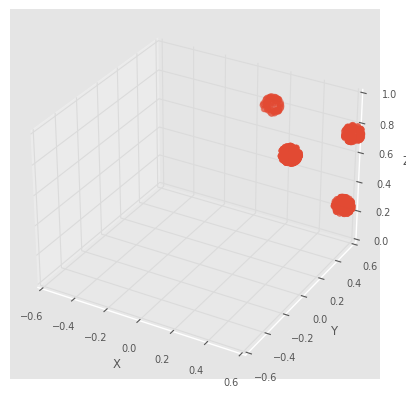

In [18]:
start_time = time.time()
t_step=0.01
points_list=[]
for i in range(len(obstacles)):
    print("collision:",collisions[i])
    obstacles[i].move(move_v[i]*t_step)
    points = obstacles[i].points
    points_list.append(points)

all_points = torch.cat(points_list, dim=0)
print(all_points.shape)

end_time = time.time()

execution_time = end_time - start_time
print(f"Program executed in: {execution_time} seconds")
for i in range(len(obstacles)):
    print(obstacles[i].position)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.6, 0.6)  
ax.set_ylim(-0.6, 0.6)  
ax.set_zlim(0, 1)  
ax.scatter(all_points[:, 0], all_points[:, 1], all_points[:, 2])
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plt.show()



In [19]:
import torch
import time
from sdfsc.colchecker import colchecker
checker=colchecker(use_selfcol=True)
def SDFSC_link_collision_damper(
        obstacles,
        t_step,
        q,
        di: float = 0.4,
        ds: float = 0.05,
        xi: float =1.0,
    ):
    n=len(q)
    points_list=[]
    for i in range(len(obstacles)):
        points = obstacles[i].points
        points_list.append(points)
        obstacles[i].move(move_v[i]*t_step)
    all_points = torch.cat(points_list, dim=0)
    # print(all_points.shape)
    global checker
    checker.get_points(all_points)
    col_func=checker.get_scores
    q_tensor=torch.tensor(q, dtype=torch.float32, device='cuda',requires_grad=True)

    d_start=time.time()
    d=col_func(q_tensor).cpu().item()
    d_end=time.time()
    jac_start=time.time()
    jac = -torch.autograd.functional.jacobian(
            lambda x: col_func(x), 
            q_tensor,
            create_graph=False, strict=False,
            vectorize=True, strategy='reverse-mode'
        )*1e-1
    jac_end=time.time()
    # print("cost time jac:",(jac_end-jac_start))
    print("jac.shape=",jac.shape)
    c_Ain=np.zeros((n,7))
    c_bin=np.zeros(n,)
    c_Ain_=jac.cpu().numpy().reshape(1,n)
    c_bin_=np.array([xi*(d-ds)/(di-ds)])-0.2*t_step
    for i in range(n):
        c_Ain[i,:(i+1)]=c_Ain_[0,:(i+1)]
        c_bin[i]=c_bin_[0]
    return c_Ain,c_bin,d

!!!Modify the link function in the robotictoolbox library to read distance:

def link_collision_damper(... ):
    ...
    def indiv_calculation(link: Link, link_col: CollisionShape, q: NDArray):
        ...
        d, wTlp, wTcp = link_col.closest_point(shape, di)
        ...
        return l_Ain, l_bin,d
    d_k=10
    for link in links:
        ...
        for link_col in col_list:
            l_Ain, l_bin,d= indiv_calculation(link, link_col, q)  # type: ignore
            ...
            if d is not None :
                d_k=min(d_k,d)
    return Ain, bin,d_k

In [20]:
import time
np.set_printoptions(suppress=True)
neo_time=[]
d_t=[]
qd_old=None
def step(opt):
    start_time = time.time()  
    t_step = 0.01
    # The pose of the Panda's end-effector
    Te = panda.fkine(panda.q)
    # Transform from the end-effector to desired pose
    eTep = Te.inv() * Tep
    # Spatial error
    e = np.sum(np.abs(np.r_[eTep.t, eTep.rpy() * np.pi / 180]))

    # Calulate the required end-effector spatial velocity for the robot
    # to approach the goal. Gain is set to 1.0
    v, arrived = rtb.p_servo(Te, Tep, 1.0, 0.01)

    # Gain term (lambda) for control minimisation
    Y = 0.01

    # Quadratic component of objective function
    Q = np.eye(n + 6)

    # Joint velocity component of Q
    Q[:n, :n] *= Y

    # Slack component of Q
    Q[n:, n:] = (1 / e) * np.eye(6)

    # The equality contraints
    Aeq = np.c_[panda.jacobe(panda.q), np.eye(6)]
    beq = v.reshape((6,))

    # The inequality constraints for joint limit avoidance
    Ain = np.zeros((n + 6, n + 6))
    bin = np.zeros(n + 6)

    # The minimum angle (in radians) in which the joint is allowed to approach
    # to its limit
    ps = 0.05

    # The influence angle (in radians) in which the velocity damper
    # becomes active
    pi = 0.9
    # Form the joint limit velocity damper
    """
    ps
        The minimum angle (in radians) in which the joint is
        allowed to approach to its limit
    pi
        The influence angle (in radians) in which the velocity
        damper becomes active
    n
        The number of joints to consider. Defaults to all joints
    gain
        The gain for the velocity damper
    """
    Ain[:n, :n], bin[:n] = panda.joint_velocity_damper(ps, pi, n)
    # print("Ain.shape:",Ain.shape)
    # print("bin.shape:",bin.shape)
    global d_t
    # For obstacles in the scene
    if opt==1:
        c_Ain_ss, c_bin_ss,di = SDFSC_link_collision_damper(obstacles,t_step,panda.q[:n])
        if c_Ain_ss is not None and c_bin_ss is not None:
            c_Ain_ss = np.c_[c_Ain_ss, np.zeros((c_Ain_ss.shape[0], 6))]
            Ain_ss = np.r_[Ain, c_Ain_ss]
            bin_ss = np.r_[bin, c_bin_ss]
        d_t.append(di)
    # For each collision in the scene
    elif opt==0:
        d_col=[]
        for collision in collisions:
            # object on the robot to the collision in the scene

            #To read di, you need to modify the panda.link_collision_damper function in the library rtb
            c_Ain, c_bin,di = panda.link_collision_damper(
                collision,
                panda.q[:n],
                0.4,
                0.05,
                1.0,
                start=panda.link_dict["panda_link1"],
                end=panda.link_dict["panda_link7"],
            )
            d_col.append(di)
            # If there are any parts of the robot within the influence distance
            # to the collision in the scene
            if c_Ain is not None and c_bin is not None:
                c_Ain = np.c_[c_Ain, np.zeros((c_Ain.shape[0], 6))]
                Ain = np.r_[Ain, c_Ain]
                bin = np.r_[bin, c_bin]
        d_t.append(min(d_col))

    # Linear component of objective function: the manipulability Jacobian
    c = np.r_[-panda.jacobm(panda.q).reshape((n,)), np.zeros(6)]
    # The lower and upper bounds on the joint velocity and slack variable
    lb = -np.r_[panda.qdlim[:n], 10 * np.ones(6)]
    ub = np.r_[panda.qdlim[:n], 10 * np.ones(6)]
    # Solve for the joint velocities dq and Apply the joint velocities to the Panda
    global qd_old
    if opt==1:
        qd_ss = qp.solve_qp(Q, c, Ain_ss,bin_ss, Aeq, beq, lb=lb, ub=ub,solver="proxqp")
        if qd_ss is None:
            qd_ss=qd_old
        else:
            qd_ss=qd_ss
        panda.qd[:n] = qd_ss[:n]
    elif opt==0:
        qd = qp.solve_qp(Q, c, Ain ,bin, Aeq, beq, lb=lb, ub=ub,solver="proxqp")
        if qd is None:
            qd=qd_old
        else:
            qd_old=qd
        panda.qd[:n] = qd[:n]
    
    end_time = time.time()  
    execute_time = end_time - start_time
    global neo_time

    neo_time.append(execute_time)
    # Step the simulator by 50 ms
    env.step(t_step)
    time.sleep(0.01)
    return arrived

In [21]:
"""
opt=1 NEO-SS
opt=0 NEO
"""
def run():
    arrived = False
    while not arrived:
        arrived = step(opt=0)
if __name__ == '__main__':
    step(opt=0)
    run()

0.0021011829376220703 0.002766390448635064
618


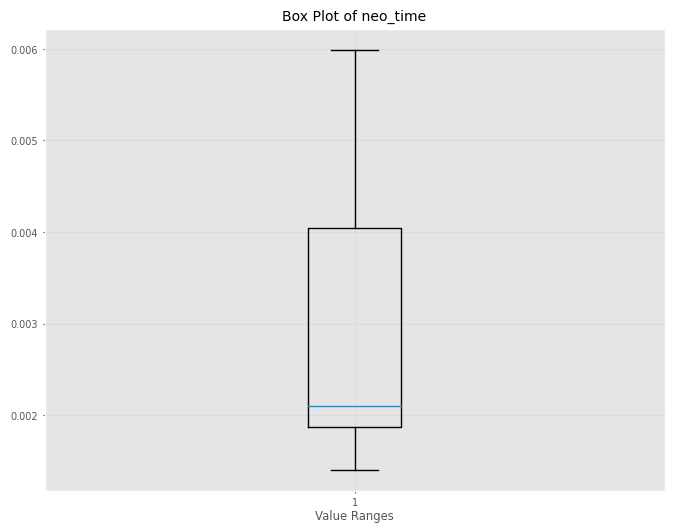

In [22]:
import matplotlib.pyplot as plt
def calculate_median_and_mean(neo_time):
    # Remove maximum deviation
    max_value = max(neo_time)
    neo_time.remove(max_value)
    
    sorted_neo_time = sorted(neo_time)
    
    # Calculate median
    n = len(sorted_neo_time)
    mid_index = n // 2
    if n % 2 == 1:
        median = sorted_neo_time[mid_index]
    else:
        median = (sorted_neo_time[mid_index - 1] + sorted_neo_time[mid_index]) / 2
    
    # Calculate the average
    mean = sum(sorted_neo_time) / n
    
    return median, mean
median, mean=calculate_median_and_mean(neo_time)
print(median, mean)
print(len(neo_time))

plt.figure(figsize=(8, 6))
plt.boxplot(neo_time, vert=True)  

plt.title('Box Plot of neo_time')
plt.xlabel('Value Ranges')

plt.show()

In [23]:
# #plot distance
# plt.figure(figsize=(8, 6))
# # np.save('plan_data/d_neo_sdfsc.npy',d_t)
# d_a=d_t[:700]
# x=range(len(d_a))
# plt.plot(x, d_a)
# plt.title('distace')
# plt.xlabel('time')

# plt.show()